<a href="https://colab.research.google.com/github/chengren/NPOs/blob/master/sswr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
filepath='/content/drive/My Drive/Colab Notebooks/sswr/human_service_pr_com.csv'

In [0]:
#Import all the dependencies
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import re
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import nltk
from textblob import TextBlob
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
import xgboost as xgb
from nltk.stem import PorterStemmer
from nltk import word_tokenize
nltk.download('punkt')
from wordcloud import WordCloud 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [0]:
df = pd.read_csv(filepath)
print('load')

load


In [0]:
df.head()

,ein,ntee1,ntee,state,name,address,city,zip,n,fre,start_year,end_year,ave_rate,totrev_mean,tot_pub_sup_mean,secur_mean,salesexp_mean,invinc_mean,solicit_mean,goods_mean,grprof_mean,grrec_mean,exps_mean,fundbal_mean,compens_mean,fundfees_mean,ass_boy_mean,ass_eoy_mean,liab_boy_mean,liab_eoy_mean,progrev_mean,prg_pre_total_mean,net_mean,ast_gain_mean,lab_gain_mean,gap_end_mean,ins_pre_total_mean,con_pre_total_mean,p_rate2_mean,pd_mean,totrev_median,tot_pub_sup_median,secur_median,salesexp_median,invinc_median,solicit_median,goods_median,grprof_median,grrec_median,exps_median,fundbal_median,compens_median,fundfees_median,ass_boy_median,ass_eoy_median,liab_boy_median,liab_eoy_median,progrev_median,prg_pre_total_median,net_median,ast_gain_median,lab_gain_median,gap_end_median,ins_pre_total_median,con_pre_total_median,p_rate2_median,pd_median
0,10015091,N,N64,NJ,HANOVER SOCCER CLUB INC,PO BOX 13,CEDAR KNOLLS,07927-0013,4,4,2012,2015,-0.955951,120275.250000,0.000000,NaN,0.000000,25.250000,0.00,0.000000,0.000000,120275.250000,119939.000000,60436.250000,0.0,0.0,61533.333333,60436.250000,0.000000,0.00000,120250.000000,99.978704,336.250000,2036.000000,0.000000,60436.250000,0.021296,0.000000,3.200,0.0,115563.5,0.0,NaN,0.0,25.0,0.0,0.0,0.0,115563.5,118579.5,58924.5,0.0,0.0,60704.0,58924.5,0.0,0.0,115538.5,99.978317,2452.0,9667.0,0.0,58924.5,0.021683,0.000000,3.2,0.0
1,10017496,N,N50,ME,AGAMENTICUS YACHT CLUB OF YORK,PO BOX 534,YORK HARBOR,03911-0534,22,22,1993,2015,-5.822708,99725.045455,23677.954545,1617.588235,1072.684211,2716.045455,0.00,1566.818182,1163.227273,108832.136364,93657.318182,222622.500000,0.0,0.0,216900.500000,222601.545455,0.000000,24.50000,47215.772727,48.006025,6067.727273,5701.045455,24.500000,222577.045455,3.279823,19.550125,22.200,1.0,103856.0,13019.5,0.0,0.0,1681.5,0.0,1925.5,232.5,109991.5,94675.0,231054.0,0.0,0.0,225683.0,231054.0,0.0,0.0,37079.0,40.983484,2518.5,-1227.0,0.0,231054.0,1.673757,16.239653,22.2,1.0
2,10088397,N,N65,NJ,POP WARNER LITTLE SCHOLARS INC,1019 WHEATSHEAF RD,LINDEN,07036-2918,2,3,2008,2010,0.000000,36894.000000,36894.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,36894.000000,42113.000000,3599.000000,0.0,0.0,8818.000000,3599.000000,0.000000,0.00000,0.000000,0.000000,-5219.000000,-5219.000000,0.000000,3599.000000,0.000000,100.000000,10.200,0.0,36894.0,36894.0,0.0,0.0,0.0,0.0,0.0,0.0,36894.0,42113.0,3599.0,0.0,0.0,8818.0,3599.0,0.0,0.0,0.0,0.000000,-5219.0,-5219.0,0.0,3599.0,0.000000,100.000000,10.2,0.0
3,10133442,N,N11,ME,OXFORD COUNTY AGRICULTURAL SOCIETY,PO BOX 193,NORWAY,04268-0193,13,20,1994,2015,-17.886732,390306.550000,169373.850000,82000.000000,39418.600000,2615.750000,903.15,259.400000,218.100000,430014.550000,348721.500000,493329.050000,150.0,0.0,565059.578947,634100.650000,137245.526316,140710.20000,154325.350000,54.777937,41585.050000,43880.947368,9186.263158,493390.450000,1.019905,33.419440,17.495,1.0,370526.5,119075.5,0.0,0.0,256.0,0.0,0.0,0.0,370526.5,307045.0,586777.0,0.0,0.0,128808.0,743001.0,25000.0,27850.0,120745.5,55.304609,19637.0,-2367.0,0.0,587386.0,0.068472,38.752394,18.3,1.0
4,10153128,N,N31,ME,GREATER RUMFORD COMMUNITY CENTER,50 CONGRESS ST,RUMFORD,04276-2002,16,23,1989,2015,-6.858566,299572.260870,123304.434783,0.000000,0.000000,3408.043478,0.00,10090.826087,5635.260870,327535.086957,304830.565217,239054.173913,0.0,0.0,328378.000000,318965.913043,81372.347826,79911.73913,135975.565217,50.071818,-5258.304348,-9412.086957,-1460.608696,239054.173913,1.468269,36.196761,18.600,1.0,281753.0,144982.0,0.0,0.0,1092.0,0.0,5617.0,1967.0,288259.0,291462.0,72891.0,0.0,0.0,215534.0,210456.0,81153.0,59561.0,150094.0,49.595488,-4669.0,-1111.0,-1912.0,72891.0,0.369271,38.218469,18.6,1.0


In [0]:
df['dummy']=0
df['dummy'][df.end_year<2013]=1
print(df.shape)
df.dummy.value_counts()

(221140, 76)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0    154985
1     66155
Name: dummy, dtype: int64

In [0]:
dummy_type=pd.get_dummies(df['ntee1'])
df=pd.concat([df,dummy_type],axis=1)
df.head()

,ein,ntee1,ntee,state,name,address,city,zip,n,fre,start_year,end_year,ave_rate,totrev_mean,tot_pub_sup_mean,secur_mean,salesexp_mean,invinc_mean,solicit_mean,goods_mean,grprof_mean,grrec_mean,exps_mean,fundbal_mean,compens_mean,fundfees_mean,ass_boy_mean,ass_eoy_mean,liab_boy_mean,liab_eoy_mean,progrev_mean,prg_pre_total_mean,net_mean,ast_gain_mean,lab_gain_mean,gap_end_mean,ins_pre_total_mean,con_pre_total_mean,p_rate2_mean,pd_mean,totrev_median,tot_pub_sup_median,secur_median,salesexp_median,invinc_median,solicit_median,goods_median,grprof_median,grrec_median,exps_median,fundbal_median,compens_median,fundfees_median,ass_boy_median,ass_eoy_median,liab_boy_median,liab_eoy_median,progrev_median,prg_pre_total_median,net_median,ast_gain_median,lab_gain_median,gap_end_median,ins_pre_total_median,con_pre_total_median,p_rate2_median,pd_median,dummy,I,J,K,L,M,N,O,P
0,10015091,N,N64,NJ,HANOVER SOCCER CLUB INC,PO BOX 13,CEDAR KNOLLS,07927-0013,4,4,2012,2015,-0.955951,120275.250000,0.000000,NaN,0.000000,25.250000,0.00,0.000000,0.000000,120275.250000,119939.000000,60436.250000,0.0,0.0,61533.333333,60436.250000,0.000000,0.00000,120250.000000,99.978704,336.250000,2036.000000,0.000000,60436.250000,0.021296,0.000000,3.200,0.0,115563.5,0.0,NaN,0.0,25.0,0.0,0.0,0.0,115563.5,118579.5,58924.5,0.0,0.0,60704.0,58924.5,0.0,0.0,115538.5,99.978317,2452.0,9667.0,0.0,58924.5,0.021683,0.000000,3.2,0.0,0,0,0,0,0,0,1,0,0
1,10017496,N,N50,ME,AGAMENTICUS YACHT CLUB OF YORK,PO BOX 534,YORK HARBOR,03911-0534,22,22,1993,2015,-5.822708,99725.045455,23677.954545,1617.588235,1072.684211,2716.045455,0.00,1566.818182,1163.227273,108832.136364,93657.318182,222622.500000,0.0,0.0,216900.500000,222601.545455,0.000000,24.50000,47215.772727,48.006025,6067.727273,5701.045455,24.500000,222577.045455,3.279823,19.550125,22.200,1.0,103856.0,13019.5,0.0,0.0,1681.5,0.0,1925.5,232.5,109991.5,94675.0,231054.0,0.0,0.0,225683.0,231054.0,0.0,0.0,37079.0,40.983484,2518.5,-1227.0,0.0,231054.0,1.673757,16.239653,22.2,1.0,0,0,0,0,0,0,1,0,0
2,10088397,N,N65,NJ,POP WARNER LITTLE SCHOLARS INC,1019 WHEATSHEAF RD,LINDEN,07036-2918,2,3,2008,2010,0.000000,36894.000000,36894.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,36894.000000,42113.000000,3599.000000,0.0,0.0,8818.000000,3599.000000,0.000000,0.00000,0.000000,0.000000,-5219.000000,-5219.000000,0.000000,3599.000000,0.000000,100.000000,10.200,0.0,36894.0,36894.0,0.0,0.0,0.0,0.0,0.0,0.0,36894.0,42113.0,3599.0,0.0,0.0,8818.0,3599.0,0.0,0.0,0.0,0.000000,-5219.0,-5219.0,0.0,3599.0,0.000000,100.000000,10.2,0.0,1,0,0,0,0,0,1,0,0
3,10133442,N,N11,ME,OXFORD COUNTY AGRICULTURAL SOCIETY,PO BOX 193,NORWAY,04268-0193,13,20,1994,2015,-17.886732,390306.550000,169373.850000,82000.000000,39418.600000,2615.750000,903.15,259.400000,218.100000,430014.550000,348721.500000,493329.050000,150.0,0.0,565059.578947,634100.650000,137245.526316,140710.20000,154325.350000,54.777937,41585.050000,43880.947368,9186.263158,493390.450000,1.019905,33.419440,17.495,1.0,370526.5,119075.5,0.0,0.0,256.0,0.0,0.0,0.0,370526.5,307045.0,586777.0,0.0,0.0,128808.0,743001.0,25000.0,27850.0,120745.5,55.304609,19637.0,-2367.0,0.0,587386.0,0.068472,38.752394,18.3,1.0,0,0,0,0,0,0,1,0,0
4,10153128,N,N31,ME,GREATER RUMFORD COMMUNITY CENTER,50 CONGRESS ST,RUMFORD,04276-2002,16,23,1989,2015,-6.858566,299572.260870,123304.434783,0.000000,0.000000,3408.043478,0.00,10090.826087,5635.260870,327535.086957,304830.565217,239054.173913,0.0,0.0,328378.000000,318965.913043,81372.347826,79911.73913,135975.565217,50.071818,-5258.304348,-9412.086957,-1460.608696,239054.173913,1.468269,36.196761,18.600,1.0,281753.0,144982.0,0.0,0.0,1092.0,0.0,5617.0,1967.0,288259.0,291462.0,72891.0,0.0,0.0,215534.0,210456.0,81153.0,59561.0,150094.0,49.595488,-4669.0,-1111.0,-1912.0,72891.0,0.369271,38.218469,18.6,1.0,0,0,0,0,0,0,1,0,0


In [0]:
df= df.loc[df['ntee1'].isin(['I', 'J', 'K', 'L', 'M', 'N', 'O', 'P'])]
print(df.shape)

(221140, 76)


In [0]:
df.columns

Index(['ein', 'ntee1', 'ntee', 'state', 'name', 'address', 'city', 'zip', 'n',
       'fre', 'start_year', 'end_year', 'ave_rate', 'totrev_mean',
       'tot_pub_sup_mean', 'secur_mean', 'salesexp_mean', 'invinc_mean',
       'solicit_mean', 'goods_mean', 'grprof_mean', 'grrec_mean', 'exps_mean',
       'fundbal_mean', 'compens_mean', 'fundfees_mean', 'ass_boy_mean',
       'ass_eoy_mean', 'liab_boy_mean', 'liab_eoy_mean', 'progrev_mean',
       'prg_pre_total_mean', 'net_mean', 'ast_gain_mean', 'lab_gain_mean',
       'gap_end_mean', 'ins_pre_total_mean', 'con_pre_total_mean',
       'p_rate2_mean', 'pd_mean', 'totrev_median', 'tot_pub_sup_median',
       'secur_median', 'salesexp_median', 'invinc_median', 'solicit_median',
       'goods_median', 'grprof_median', 'grrec_median', 'exps_median',
       'fundbal_median', 'compens_median', 'fundfees_median', 'ass_boy_median',
       'ass_eoy_median', 'liab_boy_median', 'liab_eoy_median',
       'progrev_median', 'prg_pre_total_median', 'n

In [0]:
df=df.replace([np.inf, -np.inf], np.nan)
print(df.shape)

(221140, 76)


In [0]:
pd.set_option('display.max_rows', 100)
df.isnull().sum()

ein                         0
ntee1                       0
ntee                        0
state                     296
name                      302
address                  1532
city                      436
zip                       898
n                           0
fre                         0
start_year                  0
end_year                    0
ave_rate                15558
totrev_mean                 0
tot_pub_sup_mean            0
secur_mean              29321
salesexp_mean            2871
invinc_mean                 0
solicit_mean             2884
goods_mean                  0
grprof_mean                 0
grrec_mean                  0
exps_mean                   0
fundbal_mean                0
compens_mean             2871
fundfees_mean            2871
ass_boy_mean            10781
ass_eoy_mean                0
liab_boy_mean           14506
liab_eoy_mean               0
progrev_mean                0
prg_pre_total_mean       3157
net_mean                    0
ast_gain_m

In [0]:
'''X=df.drop(columns=['secur_mean', 'ass_boy_mean','liab_boy_mean','ast_gain_mean','lab_gain_mean',
                   'solicit_mean','tot_pub_sup_median', 'secur_median','ass_boy_median', 
                   'liab_boy_median', 'liab_eoy_median', 'ast_gain_median','lab_gain_median', 'gap_end_median', 'ins_pre_total_median','con_pre_total_median',
                   'ntee1', 'ntee', 'state', 'name', 'address', 'city', 'zip',])'''

"X=df.drop(columns=['secur_mean', 'ass_boy_mean','liab_boy_mean','ast_gain_mean','lab_gain_mean',\n                   'solicit_mean','tot_pub_sup_median', 'secur_median','ass_boy_median', \n                   'liab_boy_median', 'liab_eoy_median', 'ast_gain_median','lab_gain_median', 'gap_end_median', 'ins_pre_total_median','con_pre_total_median',\n                   'ntee1', 'ntee', 'state', 'name', 'address', 'city', 'zip',])"

In [0]:
X=df.drop(columns=['secur_mean', 'n','fre','end_year','ass_boy_mean','liab_boy_mean','ast_gain_mean','lab_gain_mean',
                   'solicit_mean','totrev_median', 'tot_pub_sup_median', 'secur_median',
                    'salesexp_median', 'invinc_median', 'solicit_median', 'goods_median',
                    'grprof_median', 'grrec_median', 'exps_median', 'fundbal_median',
                    'compens_median', 'fundfees_median', 'ass_boy_median', 'ass_eoy_median',
                    'liab_boy_median', 'liab_eoy_median', 'progrev_median',
                     'net_median', 'ast_gain_median',
                    'lab_gain_median', 'gap_end_median', 
                    'ntee1', 'ntee', 'state', 'name', 'address', 'city', 'zip','ass_boy_mean',
                   'ass_eoy_mean', 'liab_boy_mean', 'liab_eoy_mean','gap_end_mean'])                  
X=X.dropna()
print(X.shape)
y = X['dummy']
X=X.drop(columns=['dummy'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 66)
X.isnull().sum()

(188963, 35)


ein                     0
start_year              0
ave_rate                0
totrev_mean             0
tot_pub_sup_mean        0
salesexp_mean           0
invinc_mean             0
goods_mean              0
grprof_mean             0
grrec_mean              0
exps_mean               0
fundbal_mean            0
compens_mean            0
fundfees_mean           0
progrev_mean            0
prg_pre_total_mean      0
net_mean                0
ins_pre_total_mean      0
con_pre_total_mean      0
p_rate2_mean            0
pd_mean                 0
prg_pre_total_median    0
ins_pre_total_median    0
con_pre_total_median    0
p_rate2_median          0
pd_median               0
I                       0
J                       0
K                       0
L                       0
M                       0
N                       0
O                       0
P                       0
dtype: int64

In [0]:
X.columns

Index(['ein', 'start_year', 'ave_rate', 'totrev_mean', 'tot_pub_sup_mean',
       'salesexp_mean', 'invinc_mean', 'goods_mean', 'grprof_mean',
       'grrec_mean', 'exps_mean', 'fundbal_mean', 'compens_mean',
       'fundfees_mean', 'progrev_mean', 'prg_pre_total_mean', 'net_mean',
       'ins_pre_total_mean', 'con_pre_total_mean', 'p_rate2_mean', 'pd_mean',
       'prg_pre_total_median', 'ins_pre_total_median', 'con_pre_total_median',
       'p_rate2_median', 'pd_median', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P'],
      dtype='object')

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense
classifier_nn = Sequential()

# Adding the input layer and the first hidden layer
classifier_nn.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu', input_dim = 34))

# Adding the second hidden layer
classifier_nn.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier_nn.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier_nn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier_nn.fit(X_train, y_train, batch_size = 888, epochs = 10)
print('Neural Network Creation Successful')

Epoch 1/10
132274/132274 [==============================] - 1s 5us/step - loss: 4.6610 - acc: 0.7108
Epoch 2/10
132274/132274 [==============================] - 0s 3us/step - loss: 4.6610 - acc: 0.7108
Epoch 3/10
132274/132274 [==============================] - 0s 3us/step - loss: 4.6610 - acc: 0.7108
Epoch 4/10
132274/132274 [==============================] - 0s 3us/step - loss: 4.6610 - acc: 0.7108
Epoch 5/10
132274/132274 [==============================] - 0s 3us/step - loss: 4.6610 - acc: 0.7108
Epoch 6/10
132274/132274 [==============================] - 0s 3us/step - loss: 4.6610 - acc: 0.7108
Epoch 7/10
132274/132274 [==============================] - 0s 3us/step - loss: 4.6610 - acc: 0.7108
Epoch 8/10
132274/132274 [==============================] - 0s 3us/step - loss: 4.6610 - acc: 0.7108
Epoch 9/10
132274/132274 [==============================] - 0s 3us/step - loss: 4.6610 - acc: 0.7108
Epoch 10/10
132274/132274 [==============================] - 0s 3us/step - loss: 4.6610 - a

In [0]:
y_pred_nn=classifier_nn.predict(X_test)
y_pred_nn[y_pred_nn <= 0.5] = 0.
y_pred_nn[y_pred_nn > 0.5] = 1.
print(accuracy_score(y_test, y_pred_nn))
print(confusion_matrix(y_test, y_pred_nn))

0.28651061052408755
[[    0 40447]
 [    0 16242]]


In [0]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
#print(accuracy_score(y_test, y_pred_log))

[[ 2210 38237]
 [  272 15970]]
0.32069713701070757


In [0]:
from sklearn.linear_model import LogisticRegression
log_reg1 = LogisticRegression(C=10).fit(X_train, y_train)

# Predicting the Test set results
y_pred_log = log_reg1.predict(X_test)
print(confusion_matrix(y_test, y_pred_log))
print(accuracy_score(y_test, y_pred_log))
#print(accuracy_score(y_test, y_pred_log))

[[40336   111]
 [16218    24]]
0.7119547002063893


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


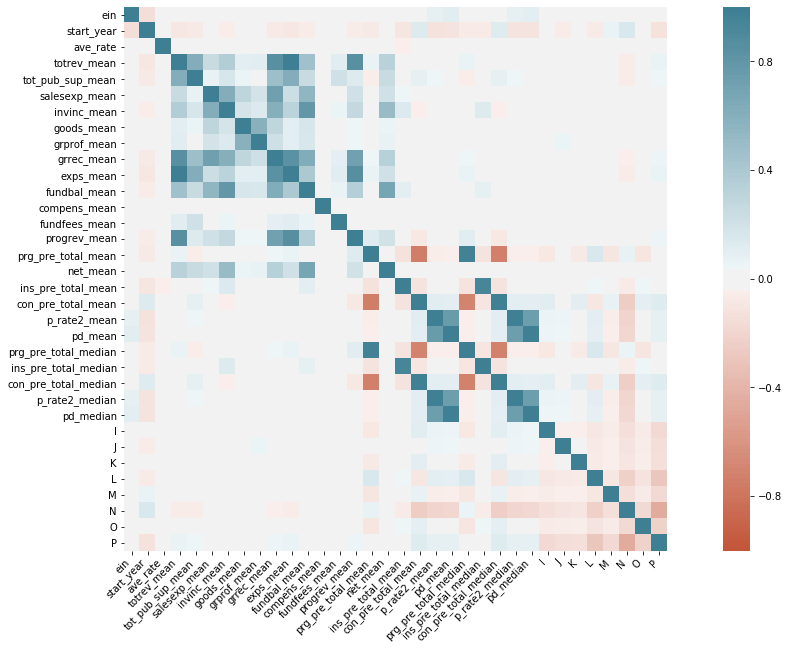

In [0]:
corr=X_train.corr()
plt.figure(figsize=(20,10))
ax = sns.heatmap(corr,
                 vmin=-1, vmax=1, center=0,
                 cmap=sns.diverging_palette(20, 220, n=400),
                 square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [0]:
model_c = ols("dummy ~ ave_rate+start_year+ntee1+totrev_mean+prg_pre_total_mean+ins_pre_total_mean+con_pre_total_mean", data=df).fit()
# summarize our model
model_c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  dummy   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     794.3
Date:                Thu, 09 Jan 2020   Prob (F-statistic):               0.00
Time:                        08:02:55   Log-Likelihood:            -1.2816e+05
No. Observations:              204460   AIC:                         2.563e+05
Df Residuals:                  204446   BIC:                         2.565e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             17.6803      0.241     73.476      0.000      17.209      18.152
ntee1[T.J]             0.0277      0.007      4.053      0.000       0.014       0.041
ntee1[T.K]            -0.1023      0.007    -14.344      0.000      -0.116      -0.088
ntee1[T.L]            -0.0753      0.005    -14.385      0.000      -0.086      -0.065
ntee1[T.M]            -0.0967      0.006    -15.720      0.000      -0.109      -0.085
ntee1[T.N]            -0.0189      0.005     -3.867      0.000      -0.028      -0.009
ntee1[T.O]             0.0116      0.006      2.051      0.040       0.001       0.023
ntee1[T.P]             0.0031      0.005      0.677      0.498      -0.006       0.012
ave_rate            1.273e-08   1.11e-08      1.146      0.252   -9.03e-09    3.45e-08
start_year            -0.0086      0.000    -71.320      0.000      -0.009      -0.008
totrev_mean        -2.601e-09   1.26e-10    -20.727      0.000   -2.85e-09   -2.36e-09
prg_pre_total_mean    -0.0024   4.65e-05    -52.043      0.000      -0.003      -0.002
ins_pre_total_mean    -0.0027      0.000    -19.905      0.000      -0.003      -0.002
con_pre_total_mean    -0.0014   4.44e-05    -32.433      0.000      -0.002      -0.001
==============================================================================
Omnibus:                    79037.055   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            28663.570
Skew:                           0.751   Prob(JB):                         0.00
Kurtosis:                       1.946   Cond. No.                     1.94e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.94e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [0]:
#random forest
classifier = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 12)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred_rf = classifier.predict(X_test)

# Making the Confusion Matrix

print(confusion_matrix(y_test, y_pred_rf))
print(accuracy_score(y_test, y_pred_rf))

[[37979  2468]
 [ 6016 10226]]
0.8503413360616698


In [0]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
# Predicting the Test set results
y_pred_tr = clf.predict(X_test)

# Making the Confusion Matrix

print(confusion_matrix(y_test, y_pred_tr))
print(accuracy_score(y_test, y_pred_tr))

[[34300  6147]
 [ 5740 10502]]
0.790312053484803


In [0]:
X_train.columns

Index(['ein', 'start_year', 'ave_rate', 'totrev_mean', 'tot_pub_sup_mean',
       'salesexp_mean', 'invinc_mean', 'goods_mean', 'grprof_mean',
       'grrec_mean', 'exps_mean', 'fundbal_mean', 'compens_mean',
       'fundfees_mean', 'progrev_mean', 'prg_pre_total_mean', 'net_mean',
       'ins_pre_total_mean', 'con_pre_total_mean', 'p_rate2_mean', 'pd_mean',
       'prg_pre_total_median', 'ins_pre_total_median', 'con_pre_total_median',
       'p_rate2_median', 'pd_median', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


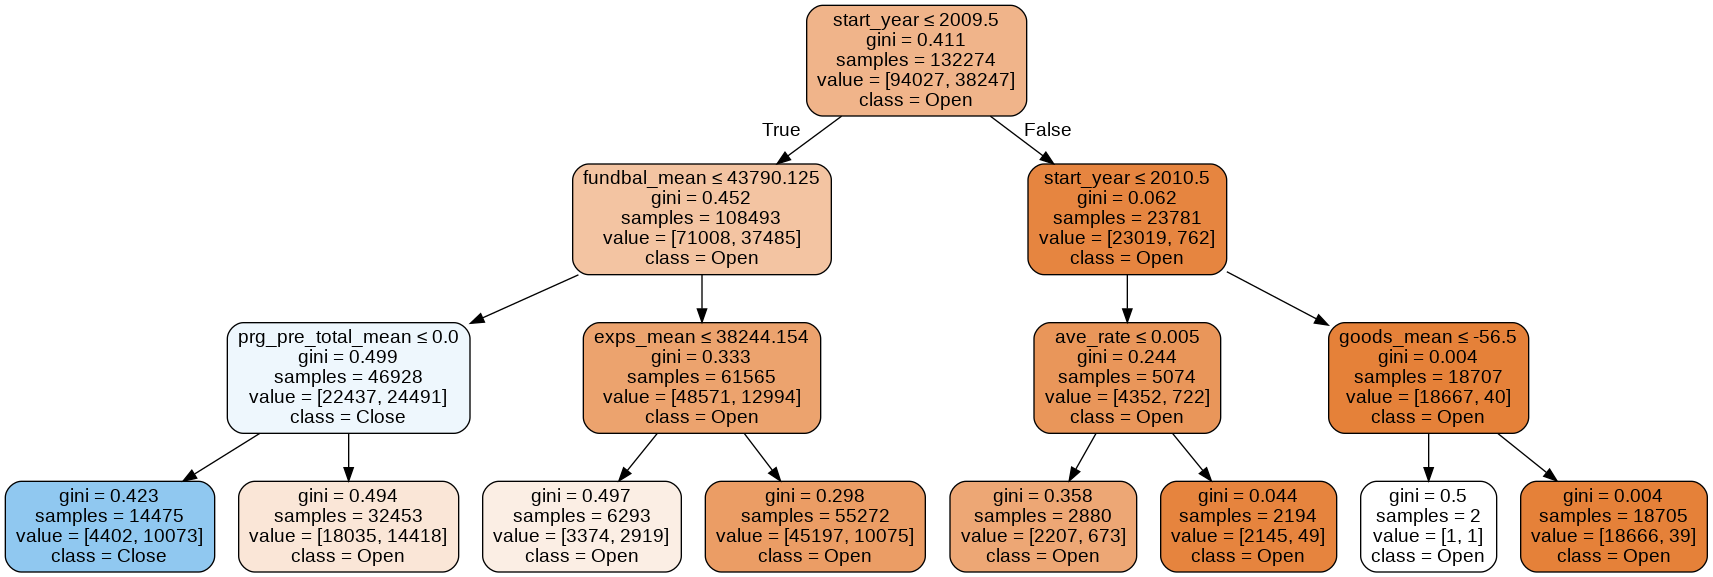

In [0]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
clf = tree.DecisionTreeClassifier(max_depth = 3)
clf = clf.fit(X_train, y_train)
dotfile = StringIO() 
tree.export_graphviz(clf, out_file=dotfile, 
                     feature_names=X_train.columns,
                     class_names=['Open', 'Close'], 
                     filled=True, rounded=True,  
                     special_characters=True)
graph = pydotplus.graph_from_dot_data(dotfile.getvalue())
Image(graph.create_png())

In [0]:
df['log_pr']=np.log10(df['progrev_mean'])
df=df.replace([np.inf, -np.inf], np.nan)
df_s=df.dropna()

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:856: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:856: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


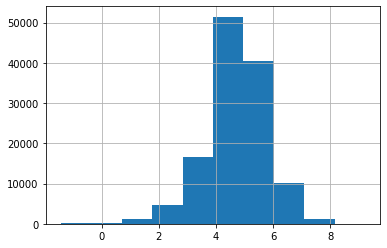

In [0]:
df_s['log_pr'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1db7480ba8>,
      dtype=object)

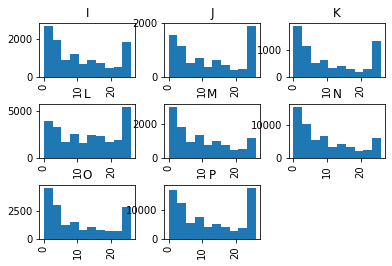

In [0]:
df['years']=df['end_year']-df['start_year']
df['years'].hist(by=df['ntee1'])

In [0]:
df.dtypes

ein                       int64
ntee1                    object
ntee                     object
state                    object
name                     object
address                  object
city                     object
zip                      object
n                         int64
fre                       int64
start_year                int64
end_year                  int64
ave_rate                float64
totrev_mean             float64
tot_pub_sup_mean        float64
secur_mean              float64
salesexp_mean           float64
invinc_mean             float64
solicit_mean            float64
goods_mean              float64
grprof_mean             float64
grrec_mean              float64
exps_mean               float64
fundbal_mean            float64
compens_mean            float64
fundfees_mean           float64
ass_boy_mean            float64
ass_eoy_mean            float64
liab_boy_mean           float64
liab_eoy_mean           float64
progrev_mean            float64
prg_pre_

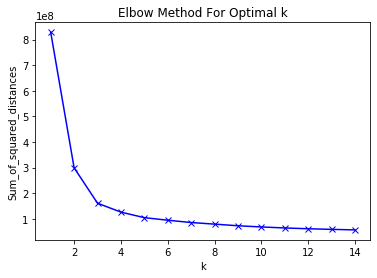

In [0]:
# YOUR CODE HERE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
df_transformed=X_train[['prg_pre_total_median', 'ins_pre_total_median', 'con_pre_total_median','p_rate2_median','start_year','prg_pre_total_mean', 'ins_pre_total_mean', 'con_pre_total_mean','p_rate2_mean']]
sum_of_sq_dist = []
K = range(1,15)
for n in K:
    kmeans = KMeans(n_clusters=n)
    kmeans = kmeans.fit(df_transformed)
    sum_of_sq_dist .append(kmeans.inertia_)
plt.plot(K, sum_of_sq_dist, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [0]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_transformed)
df_transformed['group']=kmeans.labels_
clusters=df_transformed.groupby('group').median()
clusters

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,prg_pre_total_median,ins_pre_total_median,con_pre_total_median,p_rate2_median,start_year,prg_pre_total_mean,ins_pre_total_mean,con_pre_total_mean,p_rate2_mean
group,,,,,,,,,
0,3.151439,0.129561,21.133550,12.2,1998,22.108910,0.351030,28.451160,12.32222
1,0.000000,0.011867,97.321065,14.2,2002,0.005306,0.072959,92.349065,14.40000
2,93.494730,0.040507,0.798969,12.2,1999,82.562120,0.127831,6.208002,12.42632


In [0]:
x_label=kmeans.labels_
unique_elements, counts_elements = np.unique(x_label, return_counts=True)
dic=dict(zip(unique_elements, counts_elements))
dic

{0: 33643, 1: 59590, 2: 39041}

In [0]:
df['con_pre_total_median'].describe()

count    216992.000000
mean         49.617276
std          41.368830
min           0.000000
25%           3.095409
50%          49.437945
75%          96.463448
max         100.000000
Name: con_pre_total_median, dtype: float64